# Análise dos Resultados

Aqui é feito o tratamento das estatísticas de erro para as execuções dos algoritmos *Genético* e *Memético*, *Ordenado* e *Não Ordenado*, para as instâncias da `TSPlib` sobre o **Problema do Caixeiro Viajante com Limite do Calado**

## 1) Preparação do ambiente

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
typedict ={
    'instance': object,
    'harbours': np.int32,
    'draft_var': np.int32,
    'subgroup': np.int32,
    'method': object,
    'sorting': bool,
    'mutation': np.int32,
    'avg_res': np.float32,
    'avg_ger': np.float32,
    'avg_err': np.float32,
    'min_err': np.float32,
    'best_res': np.float32,
    'avg_time': np.float32,
    'min_time': np.float32
}

def ensureType(df):
    for c in df.columns:
        df[c] = df[c].astype( typedict[c] )
    return df

results = ensureType(pd.DataFrame(columns=typedict.keys()))
results.dtypes

instance      object
harbours       int32
draft_var      int32
subgroup       int32
method        object
sorting         bool
mutation       int32
avg_res      float32
avg_ger      float32
avg_err      float32
min_err      float32
best_res     float32
avg_time     float32
min_time     float32
dtype: object

In [3]:
def loadResults(folder, method, sorting):
    global results
    os.chdir('../'+folder)
    for filename in os.listdir():
        # nome do arquivo
        s = filename.split('_')
        if(len(s) != 4):
            continue
        # leitura do arquivo
        df = pd.read_csv(filename)
        df.rename(inplace=True, columns={
            'Mutacao': 'mutation',
            'MediaRes': 'avg_res',
            'NumMedGer': 'avg_ger',
            'BestRes': 'best_res',
            'ErroMed': 'avg_err',
            'ErroMenor': 'min_err',
            'TempoMed': 'avg_time',
            'TempoMenor': 'min_time'
        })
        #adição de informação extra
        df.insert(0, 'instance', s[1][:-2])
        df.insert(1, 'harbours', s[1][-2:])
        df.insert(2, 'draft_var', s[2])
        df.insert(3, 'subgroup', s[3].split('.')[0])
        df.insert(4, 'method', method)
        df.insert(5, 'sorting', sorting)
        results = results.append(ensureType(df), ignore_index=True)
    return

In [4]:
# limpa o dataframe
results.drop(range(len(results)))
# carrega os resultados por modelo
loadResults('ResultadosAG_Artigo2','GA',False)
loadResults('ResultadosAM_Artigo2_21_11_2021','MA',False)
loadResults('ResultadosAG_Artigo2_Ordenado','GA',True)
loadResults('ResultadosAM_Artigo2_Ordenado','MA',True)
# preview
results

,instance,harbours,draft_var,subgroup,method,sorting,mutation,avg_res,avg_ger,avg_err,min_err,best_res,avg_time,min_time
0,burma,14,50,1,GA,False,0,4475.0,1.0,1.43,0.29,4425.0,0.004843,0.000000
1,burma,14,50,1,GA,False,5,4432.0,8.0,0.45,0.00,4412.0,0.004062,0.015625
2,burma,14,50,1,GA,False,10,4429.0,5.0,0.39,0.00,4412.0,0.004531,0.000000
3,burma,14,50,1,GA,False,15,4423.0,10.0,0.25,0.00,4412.0,0.005468,0.000000
4,burma,14,50,1,GA,False,20,4423.0,11.0,0.25,0.00,4412.0,0.005781,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,bayg,29,50,7,MA,True,20,2437.0,53.0,1.54,0.00,2400.0,0.374218,0.625000
9596,bayg,29,50,7,MA,True,25,2441.0,47.0,1.71,0.00,2400.0,0.365312,0.937500
9597,bayg,29,50,7,MA,True,30,2454.0,40.0,2.25,0.00,2400.0,0.352968,0.359375
9598,bayg,29,50,7,MA,True,35,2463.0,27.0,2.62,0.83,2420.0,0.327187,0.468750


## 2) Montagem dos filtros

In [5]:
def filterMethod(method=None, sorting=None, mutation=None):
    global results
    f1 = (results['method']==method) if method else True
    f2 = (results['sorting']==sorting) if sorting else True
    f3 = (results['mutation']==mutation) if mutation else True
    return (f1 & f2 & f3)

def filterInstance(instance=None, draft_var=None, subgroup=None):
    global results
    f1 = (results['instance']==instance) if instance else True
    f2 = (results['draft_var']==draft_var) if draft_var else True
    f3 = (results['subgroup']==subgroup) if subgroup else True
    return (f1 & f2 & f3)

def possibleValues(colname, df=None):
    if df is not None:
        data = list(set(df[colname].values))
    else:
        global results
        data = list(set(results[colname].values))
    data.sort()
    return data

In [6]:
for m in possibleValues('method'):
    for s in possibleValues('sorting'):
        text = 'not' if s else ''
        text = m + ('' if s else ' not') + ' sorted:'
        df = results[ filterMethod(m,s) ]
        print(text, len(df), 'rows')
        print(' > mutation:',possibleValues('mutation',df))

GA not sorted: 5280 rows
 > mutation: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
GA sorted: 2640 rows
 > mutation: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
MA not sorted: 4320 rows
 > mutation: [0, 5, 10, 15, 20, 25, 30, 35, 40]
MA sorted: 2160 rows
 > mutation: [0, 5, 10, 15, 20, 25, 30, 35, 40]


## 3) Geração dos gráficos

In [7]:
sns.set_theme(style='darkgrid', palette='Set2')
mask = results['mutation'] <= 50
os.chdir('../analytics/')

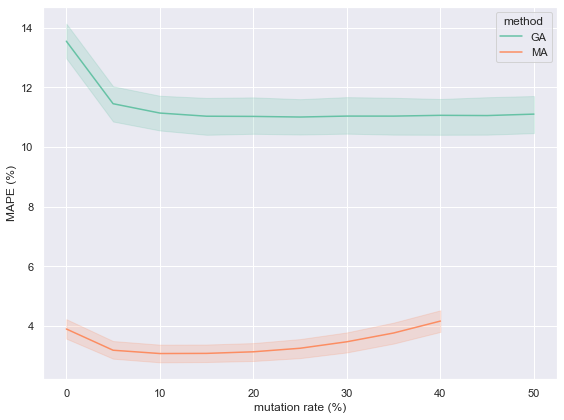

In [8]:
#============================================
# ERRO x TAXA DE MUTAÇÃO
#============================================
plt.figure(figsize=(8,6))
sns.lineplot(x='mutation', y='avg_err', data=results[mask], hue='method')
plt.xlabel('mutation rate (%)')
plt.ylabel('MAPE (%)')
plt.savefig('img/err_mutation_grouped.png', dpi=300)
plt.tight_layout()
plt.show()

Tanto para o AG quanto para o AM, o erro segue um padrão parecido conforme a mudança da taxa de mutação.

Com 0% de mutação, os métodos apresentam um desempenho ruim; de 5% à 15% o erro diminui, atingindo os menores valores; acima de 15% o erro começa a aumentar, sendo um aumento linear sutil no caso do AG e um aumento exponencial no caso do AM.

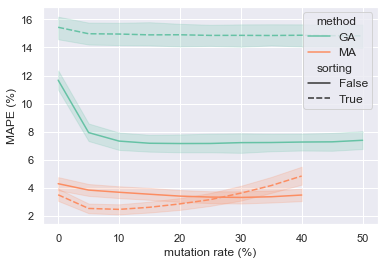

In [9]:
#============================================
# ERRO x TAXA DE MUTAÇÃO
#============================================
sns.lineplot(x='mutation', y='avg_err', data=results, hue='method', style='sorting')
plt.xlabel('mutation rate (%)')
plt.ylabel('MAPE (%)')
plt.savefig('img/err_mutation.png', dpi=300)
plt.show()

Ao separar os métodos em *ordenado* e *não ordenado*, entretanto, é possível fazer uma distinção dos desempenhos do AG e AM.

O AG permanece com o erro praticamente estável à partir de 15% de taxa de mutação, com destaque para o método que não usa ordenação durante a etapa de seleção da nova geração.

Já o AM possui cenários completamente distintos em relação à aplicação da ordenação no conjunto de soluções candidatas.

O método variante não ordenado possui um desempenho bom, semelhante ao comportamento do AG ordenado, mas com menor erro. Por fim, a implementação do AM com ordenação atinge os melhores resultados para taxas de mutação menores que  25%, com destaque para taxas pequenas (entre 5 e 10%).

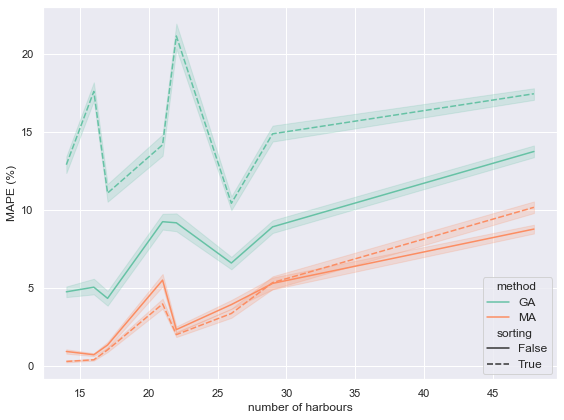

In [10]:
#============================================
# ERRO x NÚMERO DE PORTOS
#============================================
plt.figure(figsize=(8,6))
sns.lineplot(x='harbours', y='avg_err', data=results, hue='method', style='sorting')
plt.xlabel('number of harbours')
plt.ylabel('MAPE (%)')
plt.savefig('img/err_harbour.png', dpi=300)
plt.tight_layout()
plt.show()

Analisando o erro conforme o número de portos, observa-se um comportamento semelhante para todos os métodos. Com o número de portos abaixo de 30, há grande variabilidade no erro, mas para valores maiores os métodos experimentados possuem um comportamento estável.

Sobre o desempenho geral, ambas as implementações de AM (ordenado e não ordenado) possuem resultados equivalentes, com a ordenada sendo ligeiramente melhor com menos de 30 portos, e a versão não ordenada melhor em instâncias maiores.

In [12]:
mask_mut = (results['mutation']>0) & (results['mutation']<=35)
mask_GA = (results['method']=='GA') & (results['sorting']==False)
mask_MA = (results['method']=='MA') & (results['sorting']==True)

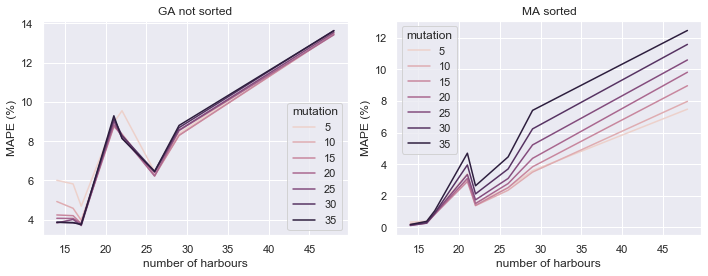

In [13]:
#============================================
# ERRO x NÚMERO DE PORTOS x MUTAÇÃO
#============================================
fig, axes = plt.subplots(1,2, figsize=(10,4), sharey=False)
#plt.ylim([0, 15])

sns.lineplot(x='harbours', y='avg_err', data=results[mask_GA & mask_mut], hue='mutation', ci=None, ax=axes[0])
sns.lineplot(x='harbours', y='avg_err', data=results[mask_MA & mask_mut], hue='mutation', ci=None, ax=axes[1])

for ax, t in zip(axes, ['GA not sorted', 'MA sorted']):
    ax.set(xlabel='number of harbours',ylabel='MAPE (%)', title=t)

plt.savefig('img/err_harbour_mutation.png', dpi=300)
plt.tight_layout()
plt.show()

Agora vamos analisar a progressão do erro conforme o número de portos para diferentes taxas de mutação para os métodos AG não ordenado e AM ordenado, que obtiveram os melhores resultados dentre as 4 variações experimentadas.

Para o AG não ordenado, quanto o número de portos é baixo (menor que 20) o que se observa é um melhor desempenho com mutações mais próximas de 30%. Em instâncias de tamanho médio e grande  (mais que 20 portos), essa diferença se torna insignificante, e implemtantações com 5% à 10% de mutação atingem os melhores resultados, além de obtê-los com um menor número de permutações e, portanto, menor custo computacional.

Para o AM ordenado, o comportamento é uniforme, e o erro aumenta regularmente conforme o aumento da taxa de mutação. Em instâncias de teste com mais de 15 portos, é possível notar uma diferença significativa no desempenho das implementações com 5% e 10% de mutação (melhores resultados) em relação às demais.

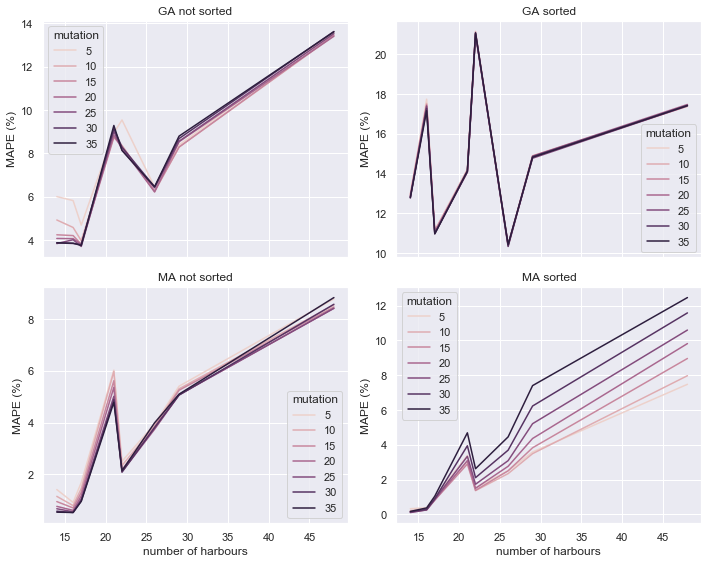

In [14]:
#============================================
# ERRO x NÚMERO DE PORTOS x MUTAÇÃO (all)
#============================================
fig, axes = plt.subplots(2,2, figsize=(10,8), sharex=True)

for row, method in zip(axes, ['GA','MA']):
    for cel, sorting in zip(row, [False,True]):
        t = method + (' ' if sorting else ' not ') + 'sorted'
        mask = mask_mut & (results['method']==method) & (results['sorting']==sorting)
        sns.lineplot(x='harbours', y='avg_err', data=results[mask], hue='mutation', ci=None, ax=cel)
        cel.set(xlabel='number of harbours', ylabel='MAPE (%)', title=t)

plt.savefig('img/err_harbour_mutation_all.png', dpi=300)
plt.tight_layout()
plt.show()

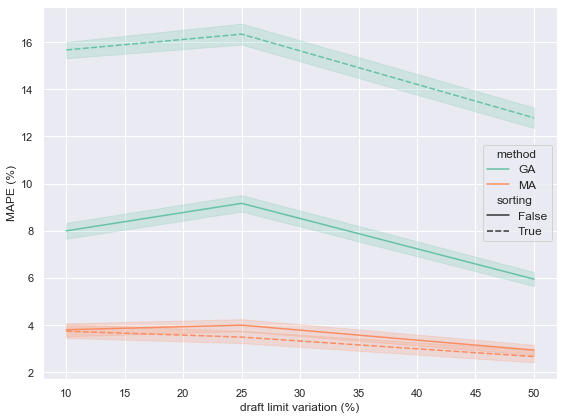

In [15]:
#============================================
# ERRO x VARIAÇÃO DO CALADO
#===========================================
plt.figure(figsize=(8,6))
sns.lineplot(x='draft_var', y='avg_err', data=results, hue='method', style='sorting')
plt.xlabel('draft limit variation (%)')
plt.ylabel('MAPE (%)')
plt.savefig('img/err_draft.png', dpi=300)
plt.tight_layout()
plt.show()

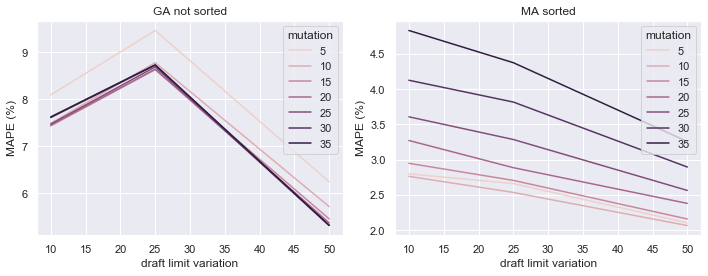

In [16]:
#============================================
# ERRO x VARIAÇÃO DO CALADO x MUTAÇÃO
#============================================
fig, axes = plt.subplots(1,2, figsize=(10,4), sharey=False)
#plt.ylim([2, 10])

sns.lineplot(x='draft_var', y='avg_err', data=results[mask_AG & mask_mut], hue='mutation', ci=None, ax=axes[0])
sns.lineplot(x='draft_var', y='avg_err', data=results[mask_AM & mask_mut], hue='mutation', ci=None, ax=axes[1])

for ax, t in zip(axes, ['GA not sorted', 'MA sorted']):
    ax.set(xlabel='draft limit variation',ylabel='MAPE (%)', title=t)

plt.savefig('img/err_draft_mutation.png', dpi=300)
plt.tight_layout()
plt.show()

Agora vamos analisar a progressão do erro conforme a variação do limite do calado para diferentes taxas de mutação para os métodos AG não ordenado e AM ordenado, que obtiveram os melhores resultados dentre as 4 variações experimentadas.

Para o AG não ordenado, se observa um erro crescente até uma variação de 25% no limite do calado, e depois uma diminuição no erro para variações maiores. Em ambos os cenários, uma mutação muito baixa (em torno de 5%) demonstrou não ser adequada, e taxas de mutação acima de 20% não possuem um desempenho significativamente melhor que justifique o uso de um alto número de permutações. Assim, os melhores resultados são obtidos nos valores intermediários, entre 10% e 20% de taxa de mutação.

Para o AM ordenado, o erro diminui conforme o aumento da variação do limite do calado para todo o intervalo testado, e é possível observar uma diferença mais clara no desempenho do método para diferentes taxas de mutação. Novamente, uma taxa de 5% não atinge os melhores resultados, em média, e mutações acima de 20% começam a se afastar do melhor desempenho obtido (mutação entre 10 e 15%).

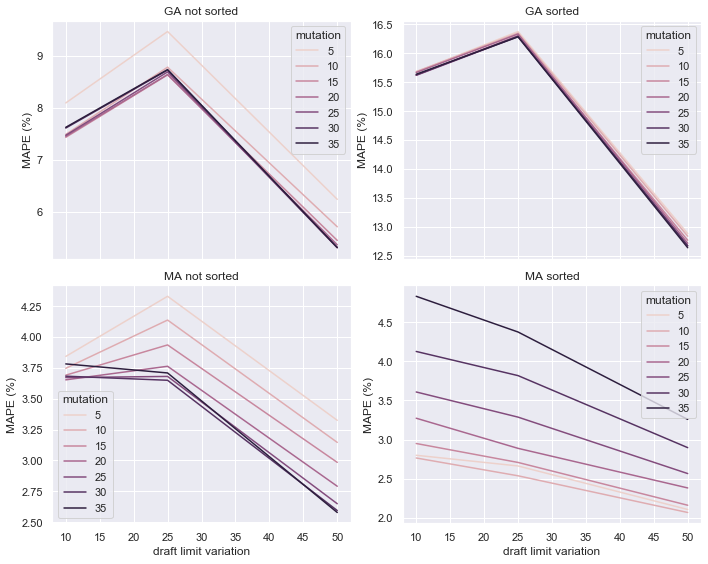

In [17]:
#============================================
# ERRO x VARIAÇÃO DO CALADO x MUTAÇÃO (all)
#============================================
fig, axes = plt.subplots(2,2, figsize=(10,8), sharex=True)

for row, method in zip(axes, ['GA','MA']):
    for cel, sorting in zip(row, [False,True]):
        t = method + (' ' if sorting else ' not ') + 'sorted'
        mask = mask_mut & (results['method']==method) & (results['sorting']==sorting)
        sns.lineplot(x='draft_var', y='avg_err', data=results[mask], hue='mutation', ci=None, ax=cel)
        cel.set(xlabel='draft limit variation', ylabel='MAPE (%)', title=t)

plt.savefig('img/err_draft_mutation_all.png', dpi=300)
plt.tight_layout()
plt.show()